# **Computational and Numerical Methods Lab - 7**

```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

In [70]:
class Interpolation:
    def __init__(self,matrix,function = None) -> None:
        self.function = function
        self.matrix = matrix
        self.err = 1e-2
    def mypolyint(self,matrix,plot_poly = False):
        x = []
        y = []
        n = len(matrix)
        for i in range(n):
            x.append(matrix[i][0])
            y.append(matrix[i][1])
        poly_coef = np.zeros(n)
        for i in range(n):
            lan = np.poly1d([1])
            for j in range(n):
                if i != j:
                    lan *= (np.poly1d([1,-x[j]])/(x[i] - x[j]))
            poly_coef += y[i] * lan.coefficients
        polynomial = np.poly1d(poly_coef)
        if plot_poly:
            self.plot_fun(x,y,polynomial)
        return poly_coef,polynomial
    
    def divided_diff(self,x,y,dp,low,high):
        if low == high:
            return y[low]
        if dp[low][high] is not None:
            return dp[low][high]
        if high == low + 1:
            dp[low][high] = (y[high] - y[low])/(x[high] - x[low])
            return dp[low][high]
        dp[low][high] = (self.divided_diff(x,y,dp,low + 1,high) - self.divided_diff(x,y,dp,low,high - 1))/(x[high] - x[low])
        return dp[low][high]
    
    def mynewtonint(self,matrix,plot_poly = False):
        x = []
        y = []
        n = len(matrix)
        for i in range(n):
            x.append(matrix[i][0])
            y.append(matrix[i][1])
        poly_coef = np.zeros(n)
        polynomial = np.poly1d([y[0]])
        x_poly = np.poly1d([1])
        dp = [[None for _ in range(n)] for _ in range(n)]
        for i in range(1,n):
            x_poly *= np.poly1d([1,-x[i-1]])
            temp = polynomial + x_poly*self.divided_diff(x,y,dp,0,i)
            polynomial = temp
        poly_coef = polynomial.coefficients
        if plot_poly:
            self.plot_fun(x,y,polynomial)
        return poly_coef,polynomial
    def plot_fun(self,x,y,polynom):
        plt.scatter(x,y,label = 'Points')
        n = len(x)
        x_range = np.arange(min(x)-0.1,max(x)+0.1,self.err)
        y_pred = polynom(x_range)
        plt.plot(x_range,y_pred,label = 'Interpolated Polynomial')
        if self.function is not None:
            plt.plot(x_range,self.function(x_range),label = 'Original Function')
        plt.legend()
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot()        

# Q - 1

In [22]:
mat = [[3.35,0.298507],[3.4,0.294118],[3.5,0.285714],[3.6,0.277778]]
x = []
y = []
n = len(mat)
for i in range(n):
    x.append(mat[i][0])
    y.append(mat[i][1])

Lagrange Interpolation:
- Lagrange Interpolation is a way of finding the value of any function at any given point when the function is not given. We use other points on the function to get the value of the function at any required point.
- Formula for lagrange interpolation:
    - Given a set of n+1 points $(x_0,y_0),(x_1,y_1)......(x_n,y_n)$, lagrange polynomial is defined as:
    - 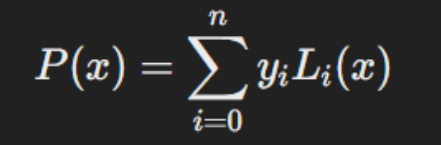
    - where $L_i(x)$ is the basis polynomial given by:
    - 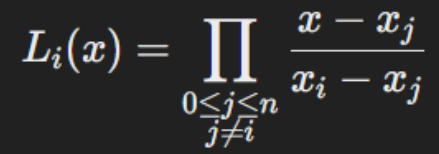

Q - 1A

In [23]:
poly_coef_langrange = []
poly_list_langrange = []
print('Langrange Interpolation')
for i in range(1,len(mat)):
    ip = Interpolation(mat)
    coef,polynomial = ip.mypolyint(mat[:i+1])
    poly_coef_langrange.append(coef)
    poly_list_langrange.append(polynomial)
    print('Coeffient of ' + str(i) + ' order polynomial =',coef)


Langrange Interpolation
Coeffient of 1 order polynomial = [-0.08778  0.59257]
Coeffient of 2 order polynomial = [ 0.02493333 -0.25608     0.87656067]
Coeffient of 3 order polynomial = [-0.00613333  0.0878     -0.47083867  1.121066  ]


Newtons Interpolation polynomial:
- Newton's interpolation is a method of polynomial interpolation that uses divided differences to construct the interpolating polynomial. It is particularly useful when data points are added incrementally, as it allows for easy updating of the polynomial without recomputing everything.
- Formula for newtons interpolating polynomial:
    - Let $P_n(x)$ denote the polynomial interpolating $f(x_i)$ at $x_i$ for i=0,1.....n . 
    - Thus $P_n(x_i) = f(x_i)$
    - General formula given below:
    - 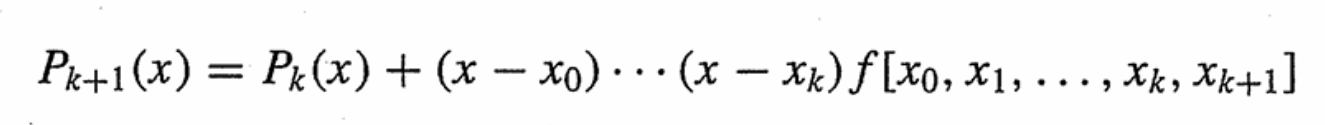
    - Here $f[x_0,x_1,...,x_k,x_{k+1}]$ is the divided difference
    - Divided difference of order n has a general formula:
    - 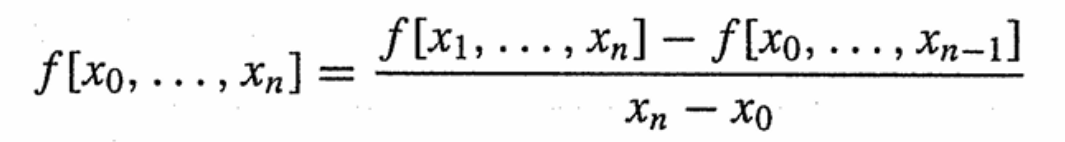

Q - 1B

In [24]:
poly_coef_newton = []
poly_list_newton = []
print('Newton Interpolation')
for i in range(1,len(mat)):
    ip = Interpolation(mat)
    coef,polynomial = ip.mynewtonint(mat[:i+1])
    poly_coef_newton.append(coef)
    poly_list_newton.append(polynomial)
    print('Coeffient of ' + str(i) + ' order polynomial =',coef)


Newton Interpolation
Coeffient of 1 order polynomial = [-0.08778  0.59257]
Coeffient of 2 order polynomial = [ 0.02493333 -0.25608     0.87656067]
Coeffient of 3 order polynomial = [-0.00613333  0.0878     -0.47083867  1.121066  ]


Q - 1C

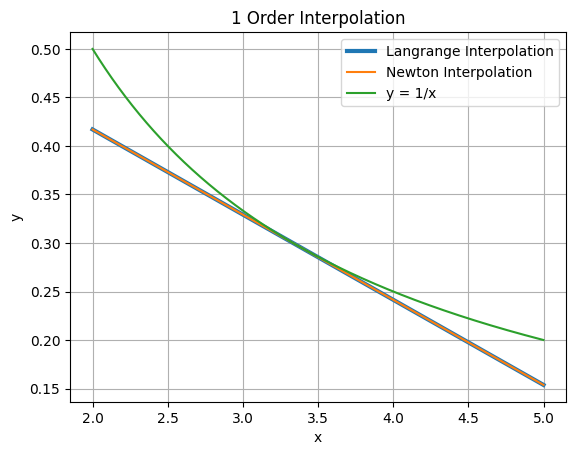

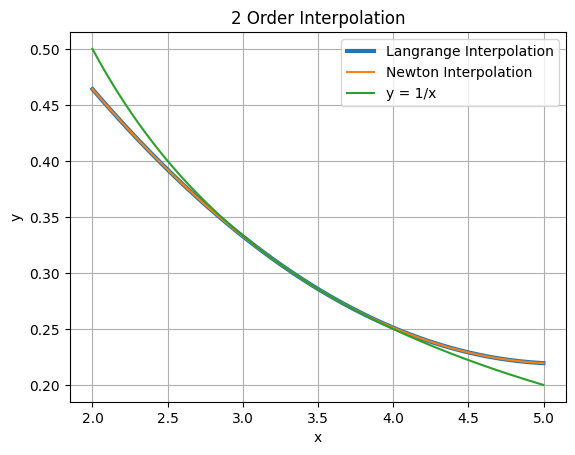

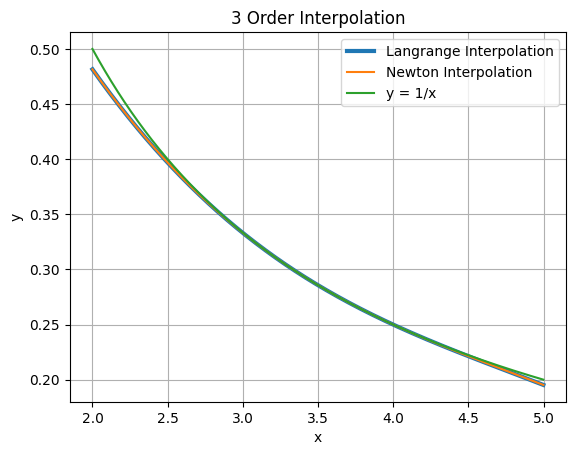

In [25]:
x_range = np.arange(2,5,0.001)
#print(poly_list_langrange[1][x_range])
for i in range(1,len(mat)):
    plt.figure(i)
    plt.plot(x_range,poly_list_langrange[i-1](x_range),label = 'Langrange Interpolation',linewidth = 3)
    plt.plot(x_range,poly_list_newton[i-1](x_range),label = 'Newton Interpolation')
    plt.plot(x_range,1/x_range,label = 'y = 1/x')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(str(i) + ' Order Interpolation')
    plt.plot()

Computational Advantages Langrange Interpolation
- Advantage : There is no recursive updates needed to compute the $l_{i}$ polynomial in langrange and symmetric formula for all points.
- Disadvantage: Not Efficient to add new points to it as it requires recalculation of at all points so as to get all $l_{i}$. Also calculation $l_i$ requires high computational cost for large data-points.

Computational Advantages Newton Interpolation
- Advantage : Efficient to add new points as it constructs the polynomial from base 0th degree to kth degree by using each point to increase the degree(by 1) of polynomial.
- Disadvantage : Initial Cost to setup divided difference formula/table for two or more datapoints is large as it requires recursive approach.

# Q - 2

In [30]:
x = [0,1,2,2.5,3,3.5,4]
y = [2.5,0.5,0.5,1.5,1.5,1.125,0]
mat = np.column_stack((x,y))

Q - 2A

Linear piecewise interpolation
- It is a method used to estimate values between known data points.
- It involves connecting adjacent data points with straight lines, making it a simple way to approximate a function.
- For two points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$, linear interpolation is given by:
    - 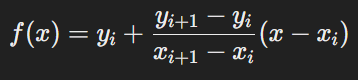


In [36]:
print('Linear Piecewise Interpolation')
poly_list_piece = []
poly_coef_piece = []
for i in range(1,len(mat)):
    ip = Interpolation(mat)
    coef,polynomial = ip.mypolyint(mat[i-1:i+1])
    poly_list_piece.append(polynomial)
    poly_coef_piece.append(coef)
    print('Piece-Wise Interpolation between',x[i-1:i+1],' gives polynomial = ',coef)
    

Linear Piecewise Interpolation
Piece-Wise Interpolation between [0, 1]  gives polynomial =  [-2.   2.5]
Piece-Wise Interpolation between [1, 2]  gives polynomial =  [0.  0.5]
Piece-Wise Interpolation between [2, 2.5]  gives polynomial =  [ 2.  -3.5]
Piece-Wise Interpolation between [2.5, 3]  gives polynomial =  [0.  1.5]
Piece-Wise Interpolation between [3, 3.5]  gives polynomial =  [-0.75  3.75]
Piece-Wise Interpolation between [3.5, 4]  gives polynomial =  [-2.25  9.  ]


Q - 2B

In [43]:
print('Quadratic Interpolation')
poly_list_quadL = []
poly_coef_quadL = []
poly_list_quadN = []
poly_coef_quadN = []
for i in range(2,len(mat),2):
    ip = Interpolation(mat)
    coef,polynomial = ip.mypolyint(mat[i-2:i+1])
    poly_list_quadL.append(polynomial)
    poly_coef_quadL.append(coef)
    coefN,polynomialN = ip.mynewtonint(mat[i-2:i+1])
    poly_list_quadN.append(polynomialN)
    poly_coef_quadN.append(coefN)
    print('Langrange Interpolation between',x[i-2:i+1],' gives Langrange polynomial = ',coef)
    print('Newton Interpolation between',x[i-2:i+1],' gives Newton Divided Difference polynomial = ',coefN)


Quadratic Interpolation
Langrange Interpolation between [0, 1, 2]  gives Langrange polynomial =  [ 1.  -3.   2.5]
Newton Interpolation between [0, 1, 2]  gives Newton Divided Difference polynomial =  [ 1.  -3.   2.5]
Langrange Interpolation between [2, 2.5, 3]  gives Langrange polynomial =  [ -2.   11.  -13.5]
Newton Interpolation between [2, 2.5, 3]  gives Newton Divided Difference polynomial =  [ -2.   11.  -13.5]
Langrange Interpolation between [3, 3.5, 4]  gives Langrange polynomial =  [ -1.5   9.  -12. ]
Newton Interpolation between [3, 3.5, 4]  gives Newton Divided Difference polynomial =  [ -1.5   9.  -12. ]


In [45]:
print(poly_list_quadL)

[poly1d([ 1. , -3. ,  2.5]), poly1d([ -2. ,  11. , -13.5]), poly1d([ -1.5,   9. , -12. ])]


Q - 2C

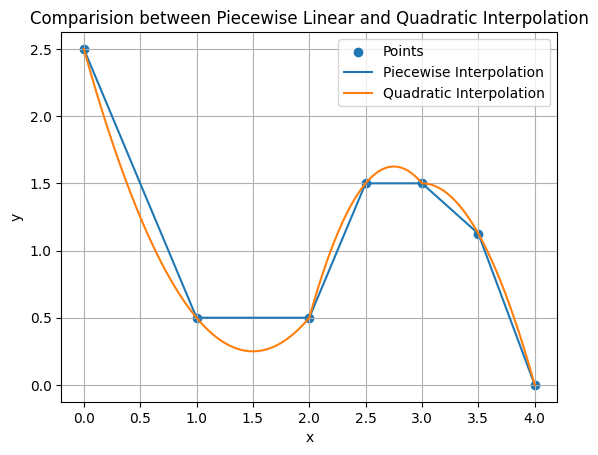

In [57]:
y_quad = []
x_r = []
for i in range(2,len(mat),2):
    x_range = np.linspace(x[i-2],x[i],1000)
    y_quad.append(poly_list_quadL[(i-2)//2](x_range))
    x_r.append(x_range)
x_r = np.array(x_r)
y_quad = np.array(y_quad)
x_r = x_r.reshape((1000*3,))
y_quad = y_quad.reshape((1000*3,))
plt.scatter(x,y,label = 'Points')
plt.plot(x,y,label ='Piecewise Interpolation')
plt.plot(x_r,y_quad,label = 'Quadratic Interpolation')
plt.plot()
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparision between Piecewise Linear and Quadratic Interpolation')
plt.show()

# Q - 3

Least sqaure polynomial fit
- The least squares polynomial fit is a method used to find a polynomial that best approximates a set of data points by minimizing the sum of the squared differences (errors) between the observed values and the values predicted by the polynomial.
- In terms of matrix representation, it is represented as $Xa=y$
  - where X is a n*(m+1) matrix containing the terms $1, x^2, x^3,...,x^m$ for each data point.
  - a is a coloumn vector containing polynomila coefficients $a_0,a_1,...,a_m$.
  - y is a coloumn vector containing the observed values $y_1,y_2,...,y_n$.
- The solution to equation is given by: 
  - $a=(X^TX)^{-1}X^Ty$
  - where $X^T$ is the transpose of X and $(X^TX)^{-1}$ is the inverse matrix.
- The resulting polynomial P(x) is the best fit polynomial of degree m that minimizes the total squared error.


In [75]:
def leastSquareErrorPolynomial(matrix,m,plot_poly = False):
    if m >= len(matrix):
        m = len(matrix)-1
    x = []
    y = []
    n = len(matrix)
    for i in range(n):
        x.append(matrix[i][0])
        y.append(matrix[i][1])
    y = np.array(y)
    A = np.zeros((n,m+1))

    for i in range(n):
        for j in range(m+1):
            A[i][j] = x[i]**j
    A_T = np.transpose(A)
    ATA = np.dot(A_T,A)
    intermediate = np.dot(np.linalg.inv(ATA),A_T)
    coef = np.dot(intermediate,y)
    coef = coef[::-1]
    polynomial = np.poly1d(coef)
    if plot_poly:
        plot_fun(x,y,polynomial)
    return coef,polynomial
def plot_fun(x,y,polynom):
        err = 1e-3
        plt.scatter(x,y,label = 'Points')
        n = len(x)
        x_range = np.arange(min(x)-0.1,max(x)+0.1,err)
        y_pred = polynom(x_range)
        plt.plot(x_range,y_pred,label = 'Least Square Error Polynomial')
        # if self.function is not None:
        #     plt.plot(x_range,self.function(x_range),label = 'Original Function')
        plt.legend()
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot()    

Coefficient of Least Square Error Polynomial :  [ 0.5 -3.   8.5 -5.2]


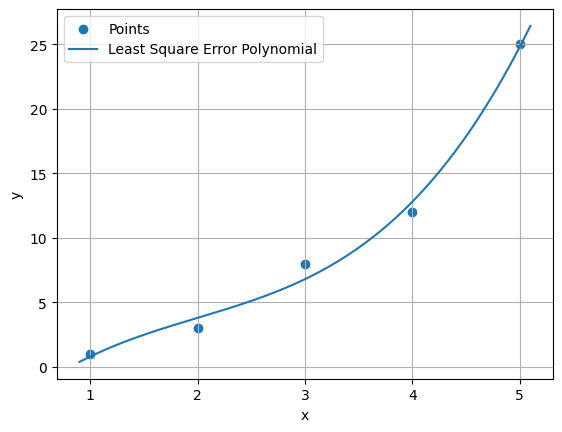

In [77]:
x = [1,2,3,4,5]
y = [1,3,8,12,25]
mat = np.column_stack((x,y))
coef,poly_i = leastSquareErrorPolynomial(mat,m=3,plot_poly=True)
print('Coefficient of Least Square Error Polynomial : ',coef)

[]

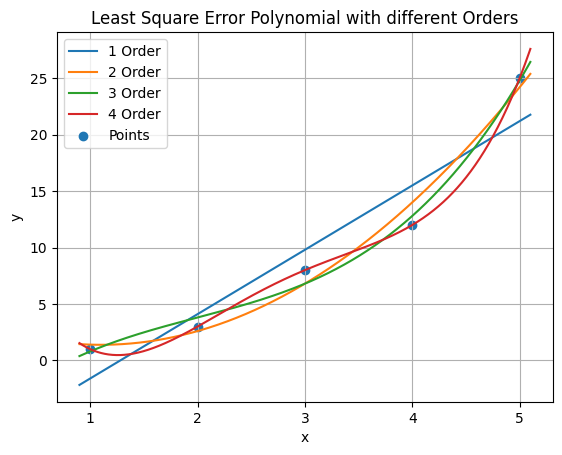

In [80]:
poly_lst = []
poly_coef = []
x_r = np.linspace(min(x)-0.1,max(x)+0.1,1000)
for i in range(1,len(x)):
    coef,poly_i = leastSquareErrorPolynomial(mat,i)
    poly_coef.append(coef)
    poly_lst.append(poly_i)
    plt.plot(x_r,poly_i(x_r),label = str(i) + ' Order')
plt.scatter(x,y,label = 'Points')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Error Polynomial with different Orders')
plt.plot()